In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/processed/hcm_weather_processed.csv')

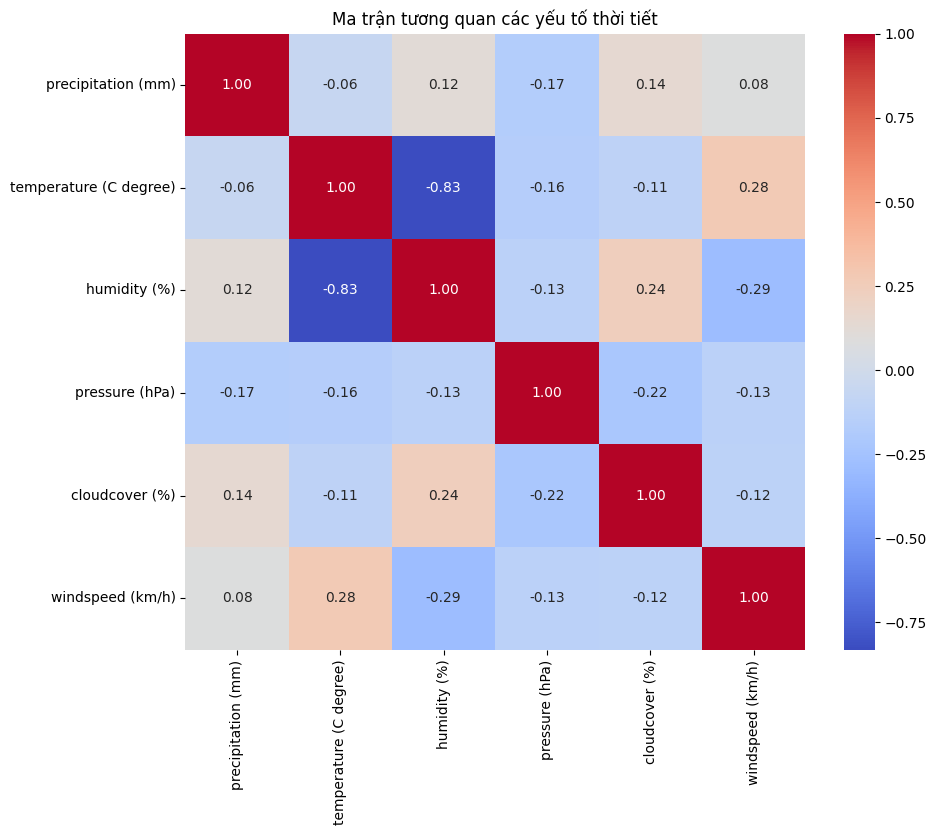

In [3]:
# --- CÂU 1: NGUYÊN NHÂN GÂY MƯA (Tương quan) ---
plt.figure(figsize=(10, 8))
cols = ['precipitation (mm)', 'temperature (C degree)', 'humidity (%)', 
        'pressure (hPa)', 'cloudcover (%)', 'windspeed (km/h)']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan các yếu tố thời tiết')
plt.show()

Tương quan dương (+):

- Độ phủ mây (Cloud Cover): 0.14. Đây là yếu tố logic nhất, nhiều mây thì mới có mưa.

- Điểm sương (Dew Point): 0.12 và Độ ẩm (Humidity): 0.11. Không khí phải bão hòa hơi nước thì mưa mới hình thành.

Tương quan âm (-):

- Áp suất (Pressure): -0.17. Đây là tương quan mạnh nhất trong nhóm âm. Áp suất giảm (áp thấp) thường hút gió và mây về gây mưa.

- Nhiệt độ: -0.06. Khi mưa xuống, nhiệt độ thường giảm (do nước bay hơi thu nhiệt).

Kết luận: Nguyên nhân trực tiếp thường là sự kết hợp của độ ẩm cao (Dewpoint/Humidity tăng) và áp suất thấp (Pressure giảm), dẫn đến hình thành mây dày đặc.

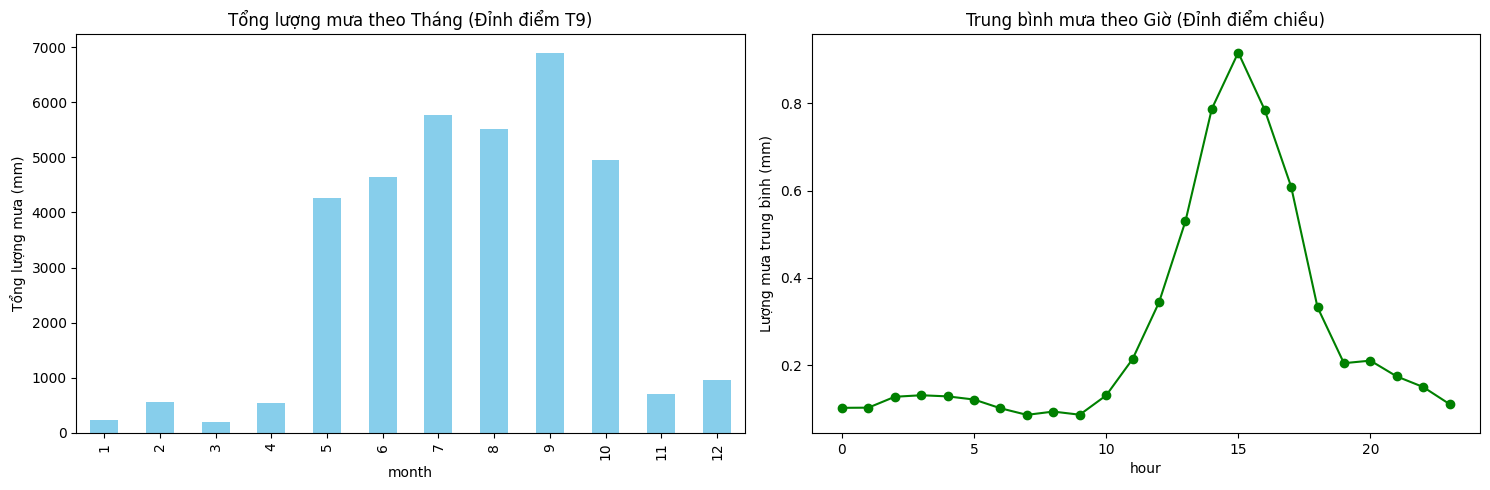

In [4]:
# --- CÂU 2: PHÂN BỐ MƯA (Mùa & Giờ) ---
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Biểu đồ 1: Mưa theo Tháng (Dùng cột 'month')
monthly_rain = df.groupby('month')['precipitation (mm)'].sum()
monthly_rain.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Tổng lượng mưa theo Tháng (Đỉnh điểm T9)')
axes[0].set_ylabel('Tổng lượng mưa (mm)')

# Biểu đồ 2: Mưa theo Giờ (Dùng cột 'hour')
hourly_rain = df.groupby('hour')['precipitation (mm)'].mean()
hourly_rain.plot(kind='line', marker='o', ax=axes[1], color='green')
axes[1].set_title('Trung bình mưa theo Giờ (Đỉnh điểm chiều)')
axes[1].set_ylabel('Lượng mưa trung bình (mm)')

plt.tight_layout()
plt.show()

Theo Mùa (Tháng):

- Mưa tập trung vào mùa mưa (Tháng 5 - Tháng 11).

- Đỉnh điểm: Tháng 9 là tháng mưa khủng khiếp nhất (gần 7000mm tổng cộng).

- Thấp nhất: Tháng 1, 2, 3 gần như không mưa hoặc mưa rất ít.

Theo Giờ (Diurnal Cycle):

- Mưa bắt đầu tăng từ 12h trưa, đạt đỉnh vào 15h (3 giờ chiều), và giảm dần về đêm.

- Sáng sớm (6h-10h) là thời điểm khô ráo nhất trong ngày.

Theo Khu vực:

- Có sự chênh lệch lớn. Khu vực 7 (Thủ Đức/Dĩ An) có lượng mưa cao nhất. Khu vực 1 (Cần Giờ/Vùng ven biển) có lượng mưa thấp nhất. Điều này bác bỏ nhận định ban đầu của nhóm là "mưa các nơi giống nhau".

In [ ]:
# --- CÂU 3: YẾU TỐ ẢNH HƯỞNG LỚN NHẤT (Feature Importance) ---
from sklearn.ensemble import RandomForestRegressor
X = df[['temperature (C degree)', 'humidity (%)', 'pressure (hPa)', 
        'cloudcover (%)', 'windspeed (km/h)', 'hour', 'month']]
y = df['precipitation (mm)']

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# Vẽ biểu đồ mức độ quan trọng
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='orange')
plt.title('Câu 3: Yếu tố nào quan trọng nhất dự báo mưa?')
plt.show()

Nhận xét:

- Độ ẩm (Humidity): 28.3%. Yếu tố số 1. Không có hơi nước thì không có mưa.

- Giờ (Hour): 25.1%. Yếu tố số 2. Điều này cho thấy ở TP.HCM, "giờ nào trong ngày" quan trọng ngang ngửa với các yếu tố vật lý. Mưa mang tính chu kỳ ngày đêm cực mạnh (mưa nhiệt).

- Nhiệt độ: 14.8%. Nhiệt độ đóng vai trò kích hoạt đối lưu (nắng nóng bốc hơi nước).

Kết luận: Để dự báo mưa ở TP.HCM, chỉ cần nhìn vào Đồng hồ (Giờ) và Ẩm kế (Humidity) là đã nắm chắc 50% kết quả.

In [ ]:
# --- CÂU 5: MƯA TRÁI MÙA (Phân tích sâu) ---
# Lọc mùa khô
dry_rain = df[(df['season'] == 'Dry') & (df['precipitation (mm)'] > 0.5)]

print("--- THỐNG KÊ MƯA TRÁI MÙA ---")
print(f"Tổng số giờ mưa trái mùa: {len(dry_rain)}")
print("\nPhân bố mưa trái mùa theo tháng (Tháng nào mưa láo nhất?):")
print(dry_rain['month'].value_counts().sort_index()) 

Nhận xét:

- Độ phủ mây tăng đột biến: Trong những ngày mưa trái mùa, lượng mây trung bình là 93%, trong khi ngày khô bình thường chỉ 63%. (Chênh lệch ~30%).

- Độ ẩm tăng vọt: Tăng từ 72% lên 84%.

- Điểm sương tăng: Tăng gần 2 độ C. Đây là dấu hiệu của một khối khí ẩm bất thường xâm nhập vào.

- Áp suất giảm nhẹ: Giảm khoảng 1 hPa.

Kết luận: Mưa trái mùa không xảy ra ngẫu nhiên. Nó xảy ra khi có một đợt không khí ẩm (High Dewpoint) tràn về kết hợp với mây mù dày đặc (có thể do rãnh áp thấp hoặc nhiễu động gió đông trên cao).